In [1]:
import pandas as pd

C:\Users\gopib\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df = pd.read_csv(r"C:\Users\gopib\Downloads\movie_data\movies.csv")

In [3]:
df

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


## What is the shape of "movies.csv"?


In [4]:
df.shape

(9742, 3)

In [5]:
df1 = pd.read_csv(r"C:\Users\gopib\Downloads\movie_data\ratings.csv")

In [6]:
df1

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


## What is the shape of "ratings.csv"?


In [7]:
df1.shape

(100836, 4)

## How many unique "userId" are available in "ratings.csv"?


In [8]:
df1['userId'].nunique()

610

## Which movie has recieved maximum number of user ratings?


In [9]:
a = df1.groupby(['movieId','rating'])[['userId']].count()

In [10]:
a[a['userId']==a['userId'].max()]

,,userId
movieId,rating,
318,5.0,153


In [11]:
df[df['movieId']==318]

,movieId,title,genres
277,318,"Shawshank Redemption, The (1994)",Crime|Drama


## Select all the correct tags submitted by users to "Matrix, The (1999)" movie?

In [12]:
df2 = pd.read_csv(r"C:\Users\gopib\Downloads\movie_data\tags.csv")

In [13]:
df2

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200
...,...,...,...,...
3678,606,7382,for katie,1171234019
3679,606,7936,austere,1173392334
3680,610,3265,gun fu,1493843984
3681,610,3265,heroic bloodshed,1493843978


In [14]:
df[df['title']=='Matrix, The (1999)']

,movieId,title,genres
1939,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller


In [15]:
df2[df2['movieId']==2571]

,userId,movieId,tag,timestamp
815,424,2571,martial arts,1457842912
816,424,2571,sci-fi,1457842899
1646,474,2571,alternate universe,1137204991
2794,537,2571,philosophy,1424141098
2795,537,2571,post apocalyptic,1424141101


## What is the average user rating for movie named "Terminator 2: Judgment Day (1991)"?

In [16]:
df[df['title']=='Terminator 2: Judgment Day (1991)']

,movieId,title,genres
507,589,Terminator 2: Judgment Day (1991),Action|Sci-Fi


In [17]:
b = df1[df1['movieId']==589]

In [18]:
b['rating'].mean()

3.970982142857143

## How does the data distribution of user ratings for "Fight Club (1999)" movie looks like?

In [19]:
import matplotlib.pyplot as plt

In [20]:
import seaborn as sns

In [21]:
df[df['title']=='Fight Club (1999)']

,movieId,title,genres
2226,2959,Fight Club (1999),Action|Crime|Drama|Thriller


In [22]:
c = df1[df1['movieId']==2959]

In [23]:
c

,userId,movieId,rating,timestamp
192,1,2959,5.0,964983282
458,4,2959,2.0,945078528
1134,10,2959,0.5,1455356582
1479,15,2959,2.5,1510571747
1635,16,2959,3.5,1377476874
...,...,...,...,...
95893,601,2959,5.0,1441639461
96788,603,2959,4.0,963176105
97835,606,2959,5.0,1171231517
99107,608,2959,5.0,1117336631


C:\Users\gopib\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='rating', ylabel='Density'>

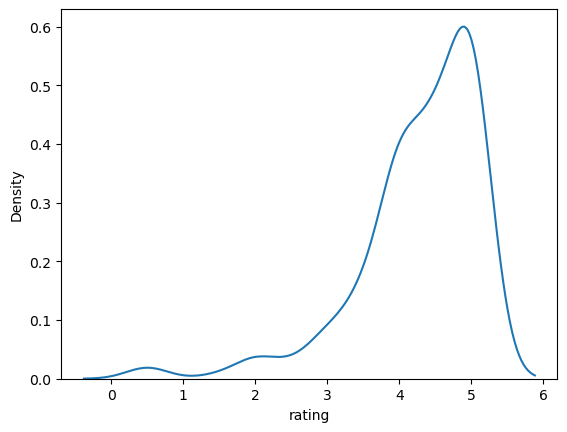

In [24]:
sns.kdeplot(data=c['rating'])

## Which movie is the most popular based on  average user ratings?

In [25]:
a = df1.groupby(['movieId','rating'])[['userId']].count()

In [26]:
a[a['userId']==a['userId'].max()]

,,userId
movieId,rating,
318,5.0,153


In [27]:
df[df['movieId']==318]

,movieId,title,genres
277,318,"Shawshank Redemption, The (1994)",Crime|Drama


## Select all the correct options which comes under top 5 popular movies based on number of user ratings.

In [28]:
d = df1.groupby('movieId')[['rating']].mean()
d

,rating
movieId,
1,3.920930
2,3.431818
3,3.259615
4,2.357143
5,3.071429
...,...
193581,4.000000
193583,3.500000
193585,3.500000


In [29]:
d['rating'].max()

5.0

In [30]:
e = df1.groupby('movieId')[['userId']].count()
e

,userId
movieId,
1,215
2,110
3,52
4,7
5,49
...,...
193581,1
193583,1
193585,1


In [31]:
e.sort_values(by='userId',ascending=False)

,userId
movieId,
356,329
318,317
296,307
593,279
2571,278
...,...
4093,1
4089,1
58351,1


In [32]:
#top1
df[df['movieId']==356]

,movieId,title,genres
314,356,Forrest Gump (1994),Comedy|Drama|Romance|War


In [33]:
#top2
df[df['movieId']==318]

,movieId,title,genres
277,318,"Shawshank Redemption, The (1994)",Crime|Drama


In [34]:
#top3
df[df['movieId']==296]

,movieId,title,genres
257,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller


In [35]:
#top4
df[df['movieId']==593]

,movieId,title,genres
510,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller


In [36]:
#top5
df[df['movieId']==2571]

,movieId,title,genres
1939,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller


## Which Sci-Fi movie is "third most popular" based on the number of user ratings?

In [37]:
df3 = pd.read_csv(r"C:\Users\gopib\Downloads\movie_data\links.csv")
df3

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
...,...,...,...
9737,193581,5476944,432131.0
9738,193583,5914996,445030.0
9739,193585,6397426,479308.0
9740,193587,8391976,483455.0


In [38]:
a = df[df['genres'].str.contains('sci-fi', case=False, regex=True)]
a

,movieId,title,genres
23,24,Powder (1995),Drama|Sci-Fi
28,29,"City of Lost Children, The (Cité des enfants p...",Adventure|Drama|Fantasy|Mystery|Sci-Fi
31,32,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller
59,66,Lawnmower Man 2: Beyond Cyberspace (1996),Action|Sci-Fi|Thriller
68,76,Screamers (1995),Action|Sci-Fi|Thriller
...,...,...,...
9713,188301,Ant-Man and the Wasp (2018),Action|Adventure|Comedy|Fantasy|Sci-Fi
9722,189547,Iron Soldier (2010),Action|Sci-Fi
9724,190183,The Darkest Minds (2018),Sci-Fi|Thriller
9731,191005,Gintama (2017),Action|Adventure|Comedy|Sci-Fi


In [39]:
b = pd.merge(a,df1,how='left',on='movieId')
b

,movieId,title,genres,userId,rating,timestamp
0,24,Powder (1995),Drama|Sci-Fi,6,4.0,845554397
1,24,Powder (1995),Drama|Sci-Fi,32,3.0,856737205
2,24,Powder (1995),Drama|Sci-Fi,71,2.0,864740028
3,24,Powder (1995),Drama|Sci-Fi,111,2.5,1518640854
4,24,Powder (1995),Drama|Sci-Fi,181,3.0,845470571
...,...,...,...,...,...,...
17238,188301,Ant-Man and the Wasp (2018),Action|Adventure|Comedy|Fantasy|Sci-Fi,596,4.0,1535709468
17239,189547,Iron Soldier (2010),Action|Sci-Fi,210,1.0,1528486011
17240,190183,The Darkest Minds (2018),Sci-Fi|Thriller,50,3.5,1533302021
17241,191005,Gintama (2017),Action|Adventure|Comedy|Sci-Fi,184,4.5,1537109489


In [40]:
b.groupby('title')[['userId']].count().sort_values(by='userId',ascending=False)

,userId
title,
"Matrix, The (1999)",278
Star Wars: Episode IV - A New Hope (1977),251
Jurassic Park (1993),238
Terminator 2: Judgment Day (1991),224
Star Wars: Episode V - The Empire Strikes Back (1980),211
...,...
Solyaris (1968),1
"Man in the White Suit, The (1951)",1
D.A.R.Y.L. (1985),1


## Mention the movieId of the movie which has the highest IMDB rating.


In [41]:
a = df1.groupby('movieId')[['userId']].count()
a

,userId
movieId,
1,215
2,110
3,52
4,7
5,49
...,...
193581,1
193583,1
193585,1


In [42]:
a1 = a[a['userId']>50]

In [43]:
b = pd.merge(a1,df3,how='left',on='movieId')
b

,movieId,userId,imdbId,tmdbId
0,1,215,114709,862.0
1,2,110,113497,8844.0
2,3,52,113228,15602.0
3,6,102,113277,949.0
4,7,54,114319,11860.0
...,...,...,...,...
431,106782,54,993846,106646.0
432,109374,52,2278388,120467.0
433,109487,73,816692,157336.0
434,112852,59,2015381,118340.0


In [44]:
import requests
import numpy as np
from bs4 import BeautifulSoup


imdbRatings = []
comb_url = []
for i in b["imdbId"]:
    url = f"http://www.imdb.com/title/tt0{i}"
    comb_url.append(url)


# Assuming comb_url is a list of URLs
for i in comb_url:
    request_header = {
        'Content-Type': 'text/html; charset=UTF-8',
        'User-Agent': 'Chrome/101.0.0.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/119.0',
        'Accept-Encoding': 'gzip, deflate, br'
    }
    page = requests.get(i, headers=request_header)
    soup = BeautifulSoup(page.text, 'html.parser')
    
    span_element = soup.find("span", class_="sc-eb51e184-1 ljxVSS")
    if span_element is not None:
        # Assuming you want to extract text or perform some action if span_element is found
        ratings_imdb = span_element.text  # or some other action
    else:
        ratings_imdb = np.nan  # Default value if span_element is not found

    imdbRatings.append(ratings_imdb)  # To see the output or do something else with ratings_imdb

    
b['imdb_ratings'] = imdbRatings

KeyboardInterrupt: 

## Mention the movieId of the movie which has the highest IMDB rating.

In [48]:
b

,movieId,userId,imdbId,tmdbId,imdb_ratings
0,1,215,114709,862.0,8.3
1,2,110,113497,8844.0,7.1
2,3,52,113228,15602.0,6.7
3,6,102,113277,949.0,8.3
4,7,54,114319,11860.0,6.3
...,...,...,...,...,...
431,106782,54,993846,106646.0,8.2
432,109374,52,2278388,120467.0,NaN
433,109487,73,816692,157336.0,8.7
434,112852,59,2015381,118340.0,NaN


In [49]:
b[b['imdb_ratings']==b['imdb_ratings'].max()]

,movieId,userId,imdbId,tmdbId,imdb_ratings
53,318,317,111161,278.0,9.3


## Mention the movieId of the "Sci-Fi" movie which has the highest IMDB rating

In [50]:
d = df[df['genres'].str.contains('sci-fi', case=False, regex=True)]
e = pd.merge(d,b,how='left',on='movieId')

In [53]:
e[e['imdb_ratings']==e['imdb_ratings'].max()]

,movieId,title,genres,userId,imdbId,tmdbId,imdb_ratings
161,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278.0,133093.0,603.0,8.7
793,109487,Interstellar (2014),Sci-Fi|IMAX,73.0,816692.0,157336.0,8.7
